## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, Load the required libraray

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## Then, I'll compute the camera calibration using chessboard images

The goal is to get the calibration matrix and distortion coefficients.

* a set of chessboard image are given.

---

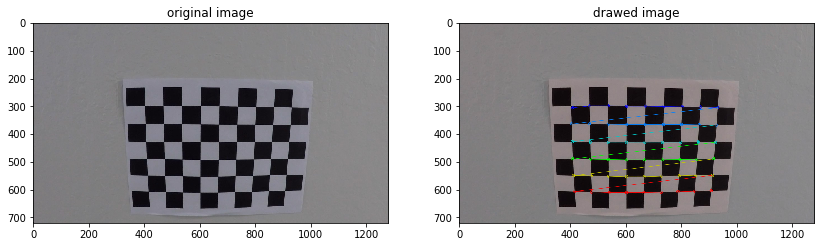

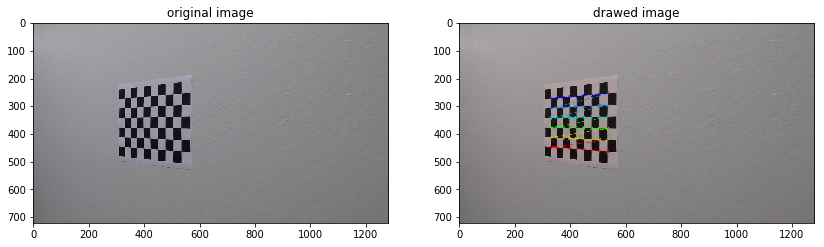

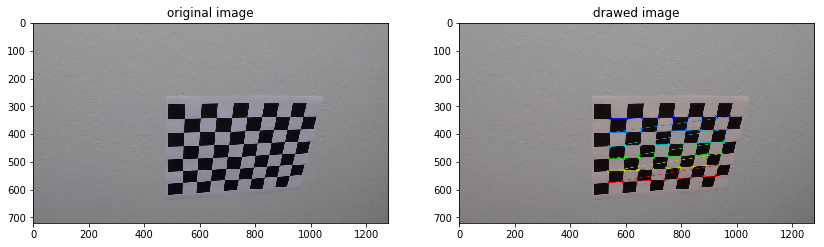

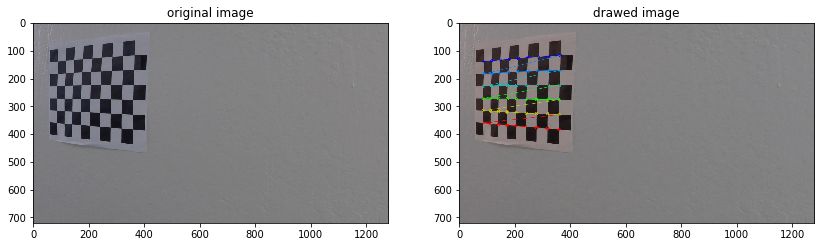

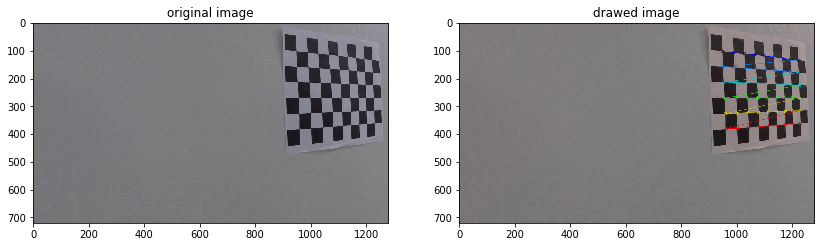

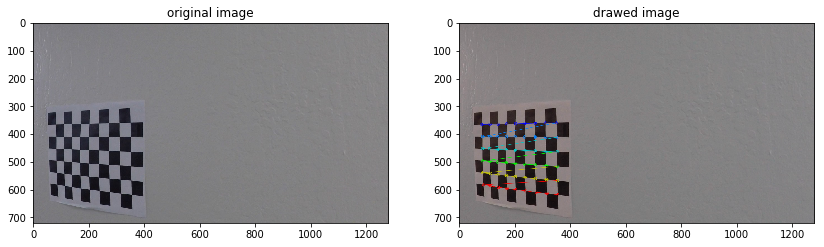

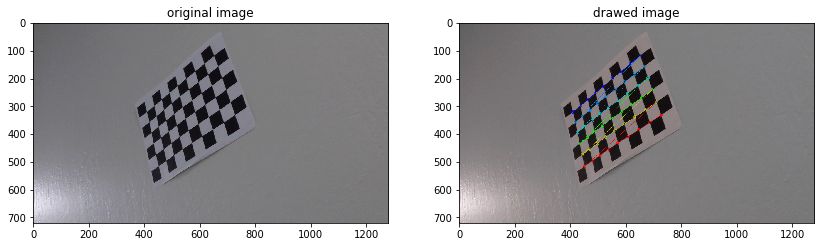

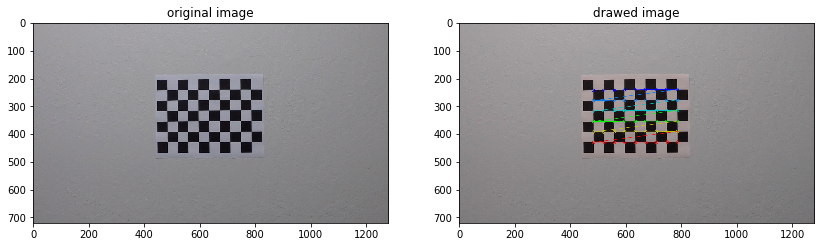

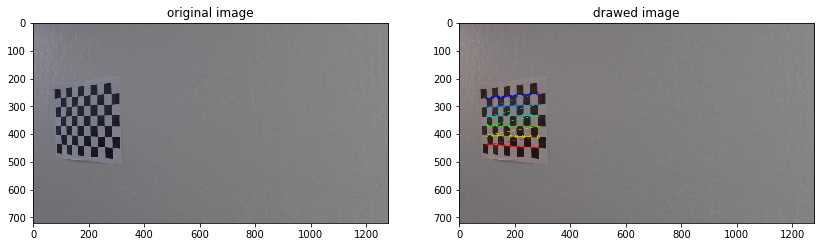

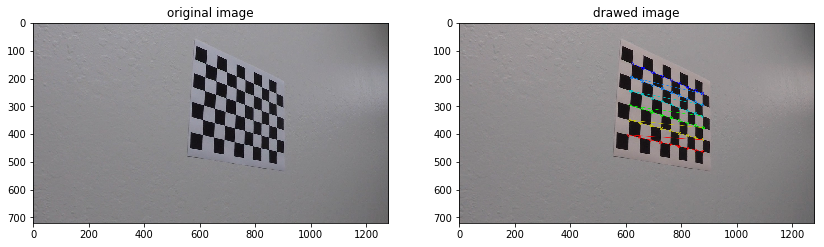

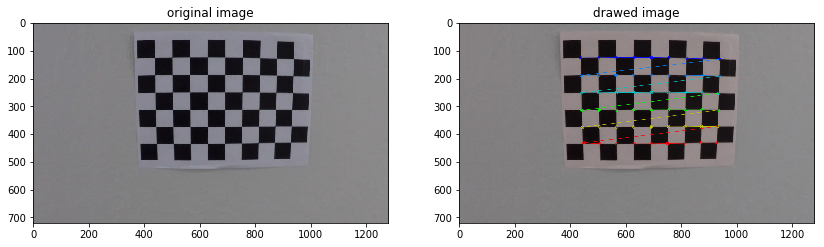

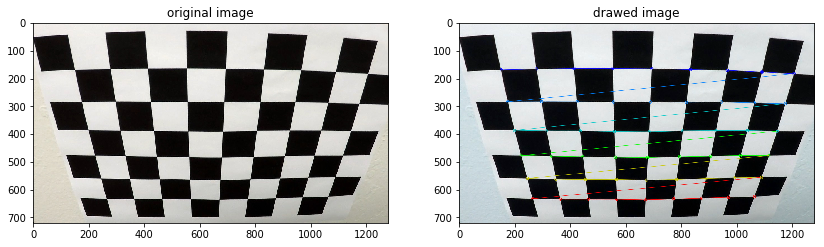

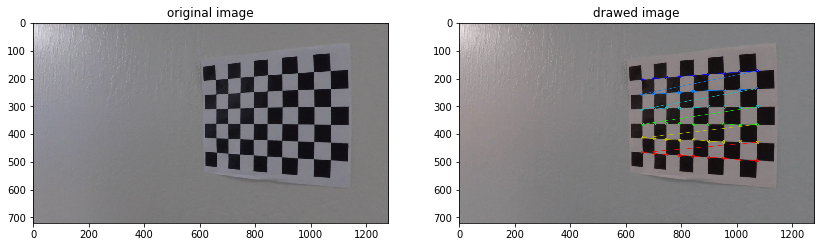

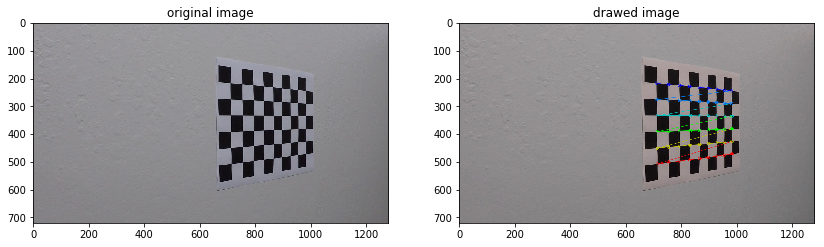

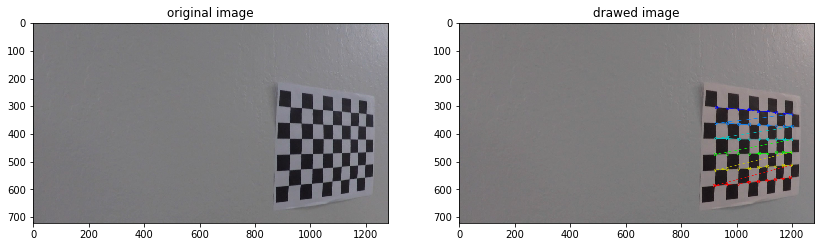

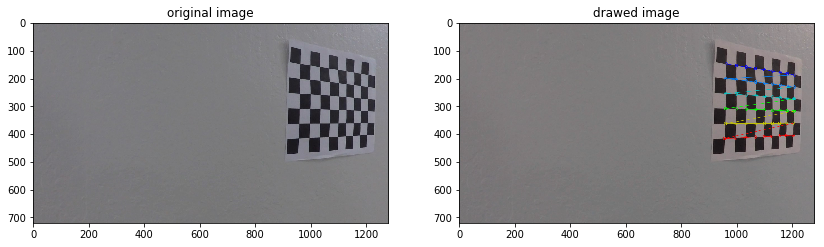

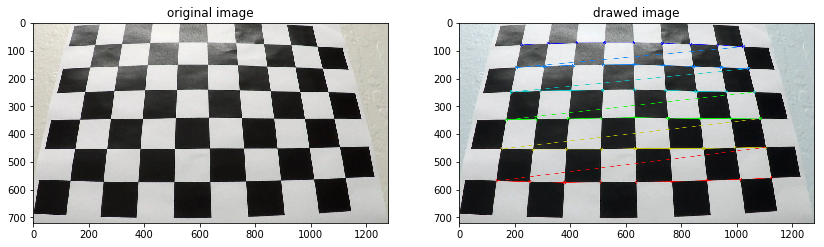

In [10]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space.
imgpoints = [] # 2d points in image plane.

# Define a function that undistort the image
def undistort_image(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undistort = cv2.undistort(img, mtx, dist, None, mtx)
    return undistort
    
# Make a list of calibration images
images = glob.glob('../CarND-Advanced-Lane-Lines/camera_cal/calibration*.jpg')  #pass a possible string in this function return a list of names

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        f, (ax1, ax2) = plt.subplots(1,2, figsize = (14,8))
        ax1.imshow(mpimg.imread(fname))
        ax1.set_title("original image")
        ax2.imshow(img)
        ax2.set_title("drawed image")

## Show the original and the undistorted image blow

In [41]:
# def undistort_all(image):
    
#     objp = np.zeros((6*9,3), np.float32)
#     objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
    
#     ret, corner = cv2.findChessboardCorners(cv2.cvtColor(image,cv2.COLOR_RGB2GRAY),(9,6),None)
    
#     if ret == True:
#         img = cv2.imread(image)
#         imsize = img.shape
#         ret, dist, mtx, rvecs, tvecs = cv2.calibrateCamera(objp, corner, imsize, None)
#         undistort = cv2.undistort(img, mtx, dist, None, mtx)
        
#     return undistort
        
       

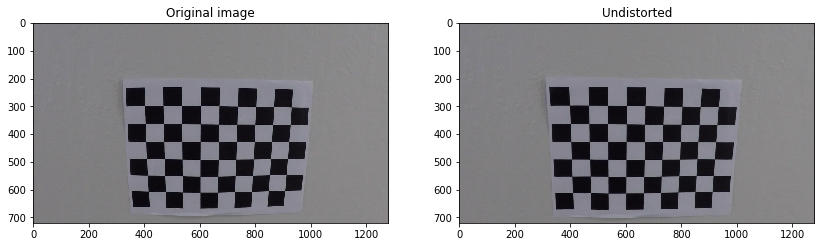

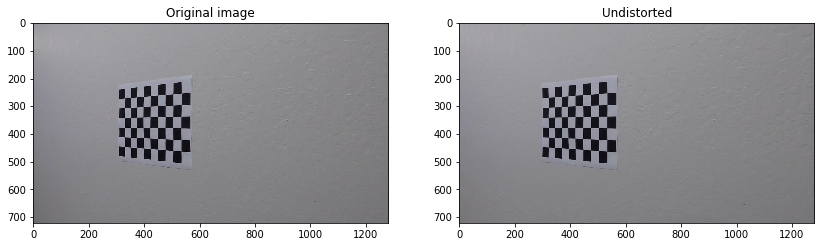

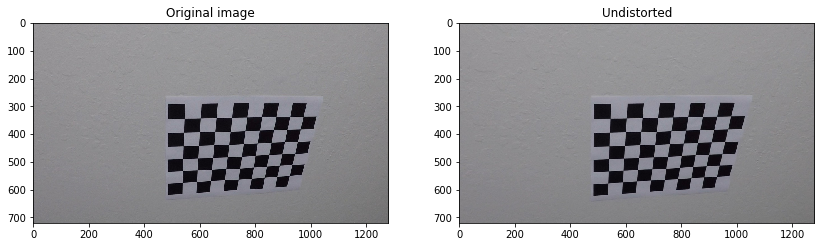

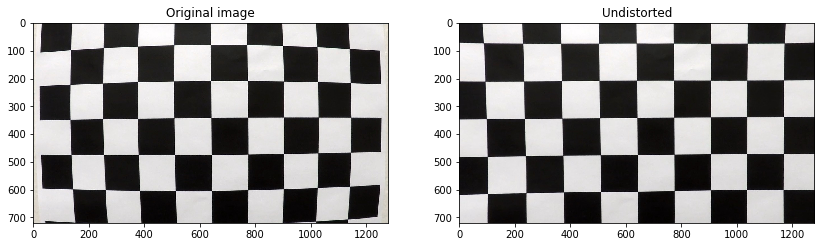

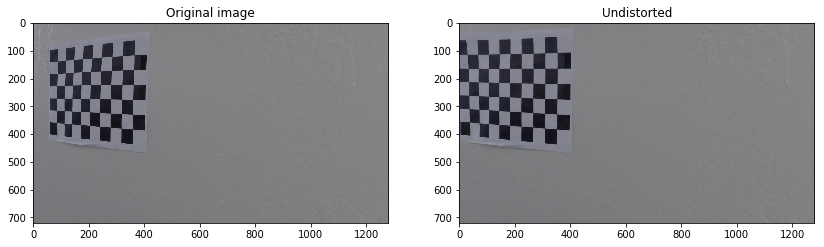

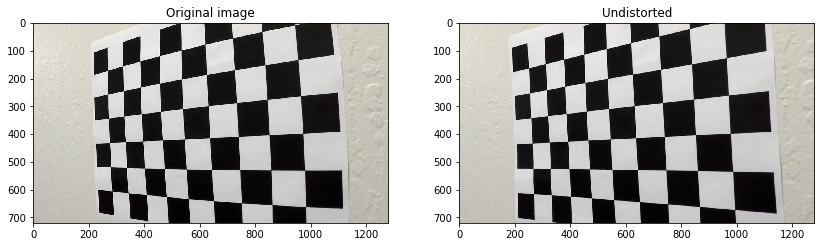

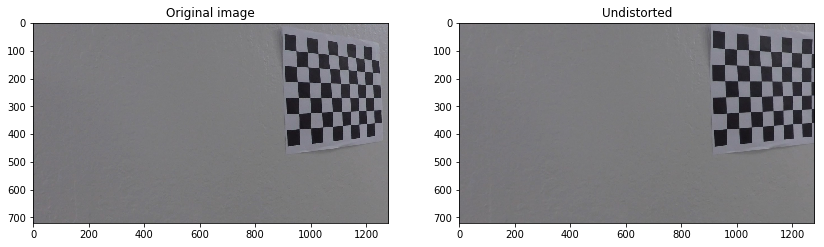

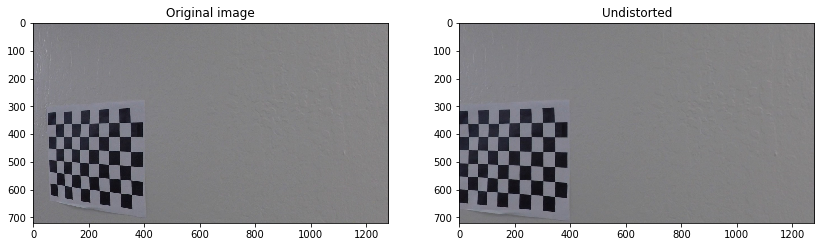

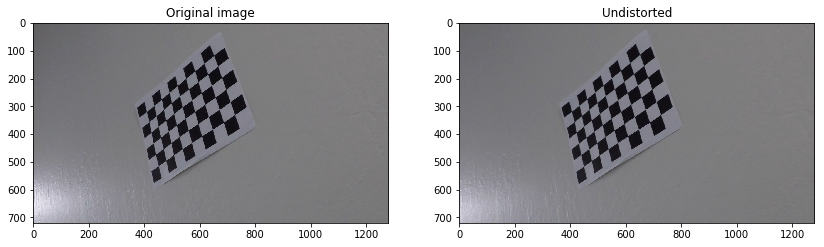

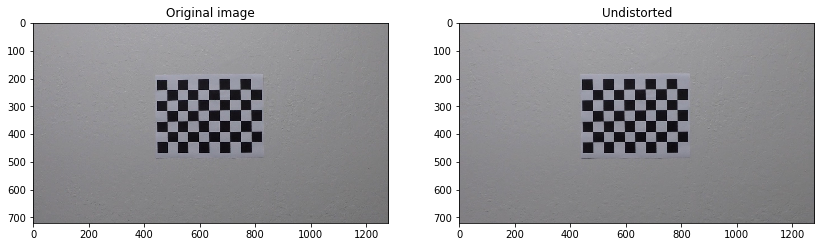

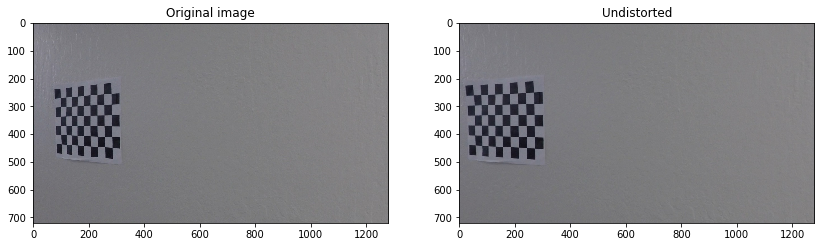

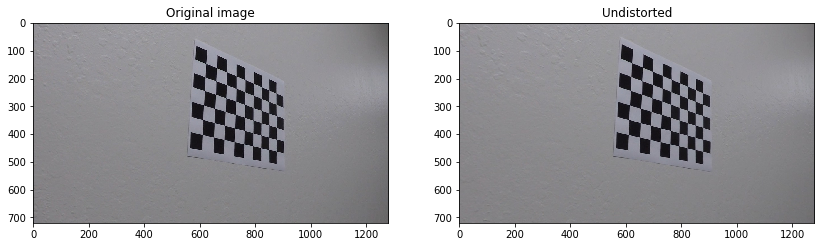

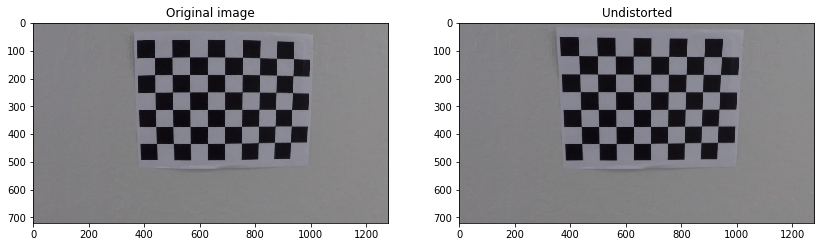

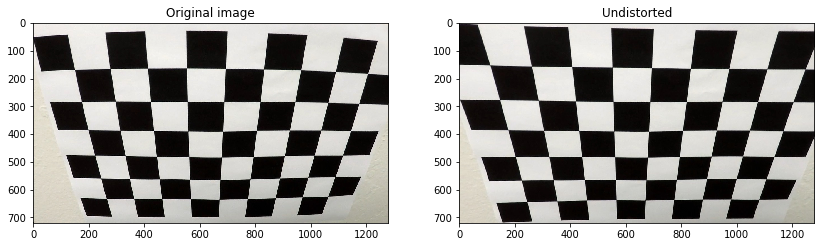

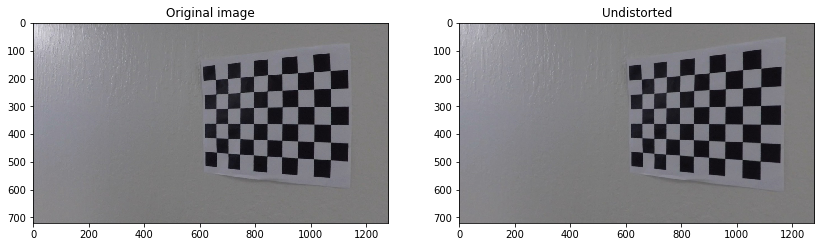

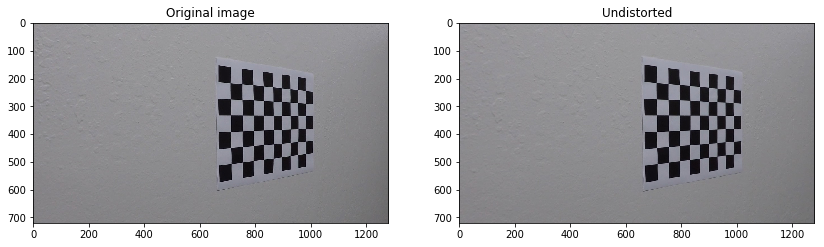

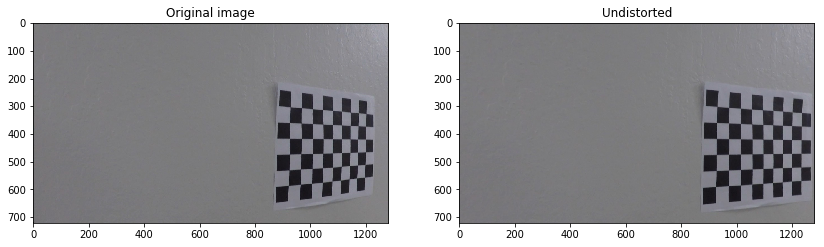

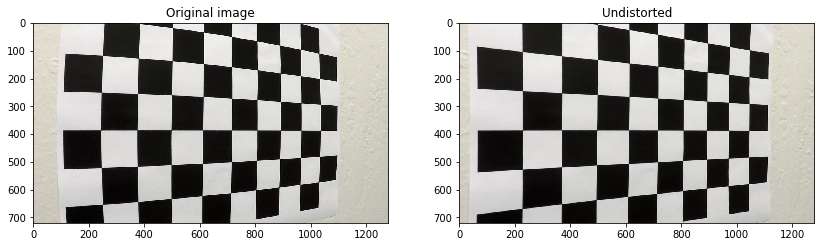

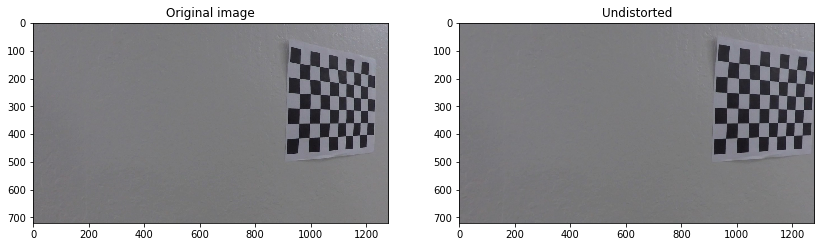

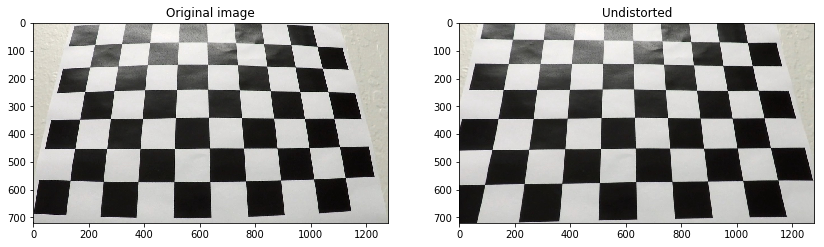

In [11]:
for fname in images:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,8))
    ax1.imshow(mpimg.imread(fname))
    ax1.set_title("Original image")
    undistort = undistort_image(mpimg.imread(fname), objpoints, imgpoints)
    ax2.imshow(undistort)
    ax2.set_title("Undistorted")

## Binary Image

In [20]:
def HLS_Color_Gradient(img, sobel_threhold, s_threhold):
    
    image = mpimg.imread(img)
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    l_image = hls[:,:,1]
    s_image = hls[:,:,2]
    
    sobelx = cv2.Sobel(l_image, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(l_image, cv2.CV_64F, 0, 1)
    sobel_all = np.sqrt(sobelx**2+sobely**2)
    scaled_sobel = np.uint8(255*sobel_all/np.max(sobel_all))
    binary_sobel = np.zeros_like(l_image)
    binary_sobel[(sobel_all>sobel_threhold[0])&(sobel_all<sobel_threhold[1])] = 1 #这里一定要加括号
    
    s_binary = np.zeros_like(l_image)
    s_binary[(s_image>s_threhold[0])&(s_image<s_threhold[1])] = 1
    
    #dstack() takes 1 positional argument!
    CG_combined = np.dstack((np.zeros_like(l_image),binary_sobel, s_binary)) *255
    
    return CG_combined

    

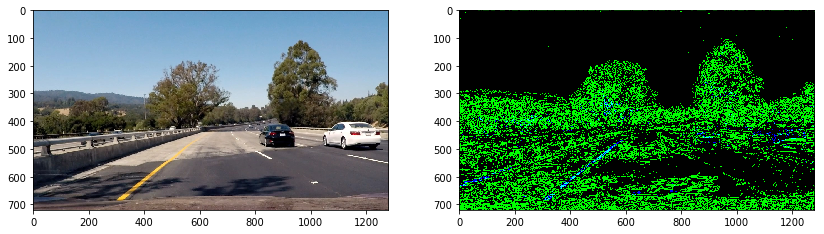

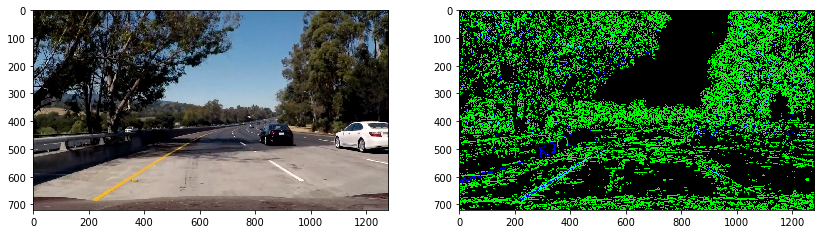

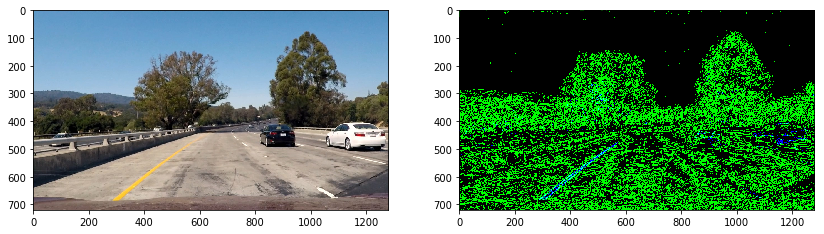

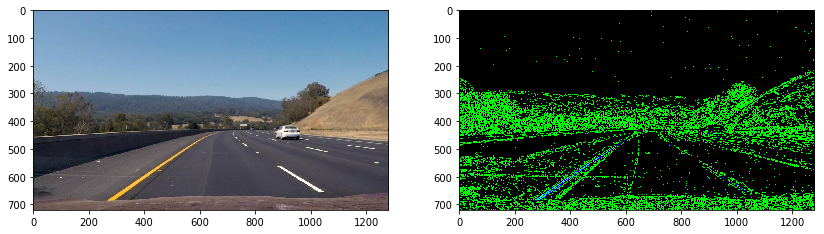

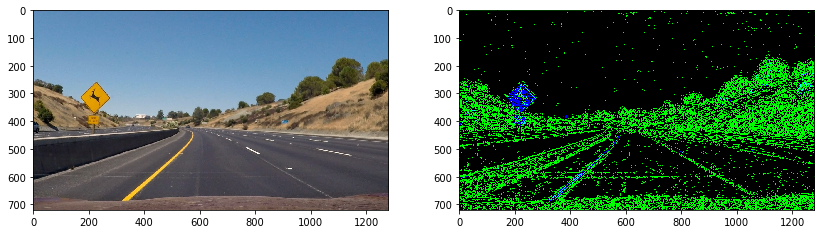

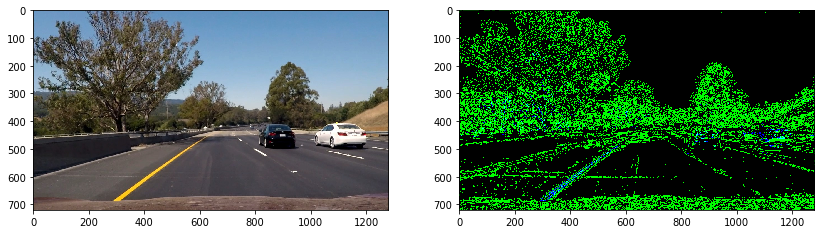

In [23]:
scenarios = glob.glob('../CarND-Advanced-Lane-Lines/test_images/test*.jpg')
for image in scenarios:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,9))
    ax1.imshow(mpimg.imread(image))
    ax2.imshow(HLS_Color_Gradient(image,[20,75],[170,255]))

## Perspective Transform

In [ ]:
def Perspective_trans():
    